# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [91]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy as sp
from scipy import stats

In [92]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [93]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [94]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\doshpara\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [95]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


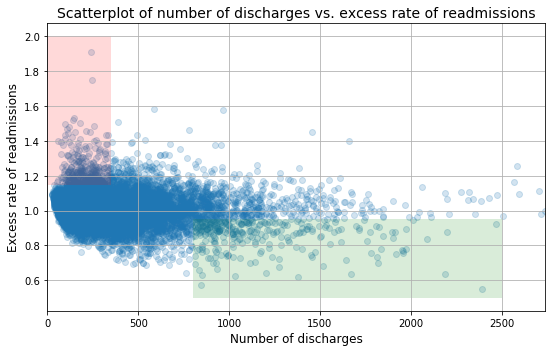

In [96]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [97]:
# Your turn

#### Overall, rate of readmissions is trending down with increasing number of discharges

In [98]:
type(x)

list

In [99]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
df = pd.concat([x,y], axis=1)
df.columns = ['discharges', 'excess_readmissions']
df.head()

,discharges,excess_readmissions
0,25,1.0914
1,27,1.0961
2,28,1.0934
3,29,1.0908
4,30,1.1123


In [100]:
df.describe()

,discharges,excess_readmissions
count,11494.000000,11494.000000
mean,364.313729,1.007541
std,299.546395,0.091912
min,25.000000,0.549500
25%,159.250000,0.952700
50%,281.000000,1.003550
75%,474.000000,1.058075
max,2740.000000,1.909500


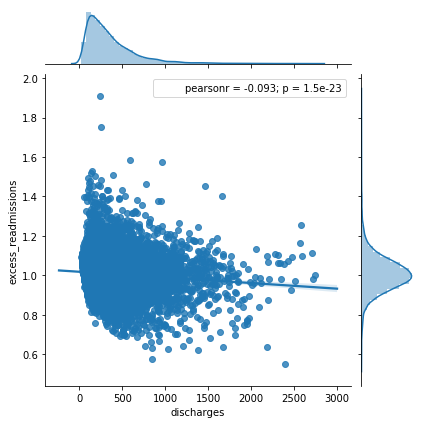

In [101]:
plt = sns.jointplot('discharges', 'excess_readmissions', data=df, kind='reg')
plt = plt.annotate(stats.pearsonr)

Given the low p-value which is below 1%, we can conclude that the statement "Overall, rate of readmissions is trending down with increasing number of discharges" is true

#### With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
#### With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

null hypothesis = excess readmission rate in red shaded area and green shaded area are the same

In [102]:
green = df[df.discharges >= 800]
green = green[green.discharges <= 2500]
green = green[green['excess_readmissions'] >= 0.50]
green = green[green['excess_readmissions'] <= 0.95]
green.head()

,discharges,excess_readmissions
10598,801,0.8525
10606,805,0.9463
10609,806,0.8814
10614,809,0.9171
10615,810,0.8567


In [103]:
red = df[df.discharges <= 350]
red = red[red['excess_readmissions'] >= 1.15]
red = red[red['excess_readmissions'] <= 2.00]
red.head()

,discharges,excess_readmissions
197,56,1.1660
199,57,1.3992
291,62,1.1764
565,76,1.3966
576,76,1.1912


In [104]:
sp.stats.ttest_ind(green['excess_readmissions'],red['excess_readmissions'])

Ttest_indResult(statistic=-54.92201598080417, pvalue=2.266563190075676e-246)

since we have a p-value that is less that alpha 0.01, we can reject the null and conclude that the excess readmission rate between the red shaded area and blue shaded is not same. And looking at the chart, we can conclude the excession readmission rate of green is lower than the excess readmission rate of red area. 

#### In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

The statement aboe is correct based on math below

In [105]:
df_less_100 = df[df.discharges<100]
print('Excess readmission rate :', '%.3f' % df_less_100['excess_readmissions'].mean() )

Excess readmission rate : 1.023


In [106]:
df_less_100_num =  len( df_less_100[df_less_100.excess_readmissions>1] )
df_less_100_denom = len ( df_less_100 )
ratio = df_less_100_num / df_less_100_denom
print('%.2f' % ratio, 'have excess readmission rate greater than 1')

0.63 have excess readmission rate greater than 1


#### In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

The statement aboe is correct based on math below

In [107]:
df_greater_1000 = df[df.discharges>1000]
print('Excess readmission rate :', '%.3f' % df_greater_1000['excess_readmissions'].mean() )

Excess readmission rate : 0.979


In [108]:
df_greater_1000_num =  len( df_greater_1000[df_greater_1000.excess_readmissions>1] )
df_greater_1000_denom = len ( df_greater_1000)
ratio = df_greater_1000_num / df_greater_1000_denom
print('%.2f' % ratio, 'have excess readmission rate greater than 1')

0.45 have excess readmission rate greater than 1


#### There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

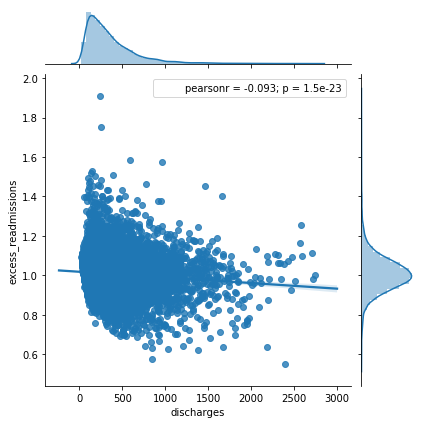

In [109]:
plt = sns.jointplot('discharges', 'excess_readmissions', data=df, kind='reg')
plt = plt.annotate(stats.pearsonr)

Based on the p-value, we can say that there is signficant correlation. However, the coefficient value is -0.093 which tells us that two things: 1) there's negative correlation 2) since the range is -1 to 1, this isn't a high correlation coefficient 

So, we have to be careful in making conclusion based on it not having a high correlation coefficient. 

#### Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

#### Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

#### Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

correlation is not same as causation. Through statistical tests, we have tested correlation between number of discharges (hospital capacity) and excess readmissions rate but we haven't tested to see if there are any confounding factors. Before concluding this, we should analyze this further with additional data points to parse out this conclusion. So overall, I don't agree with the conclusion made in by this study.